In [1]:
import networkx as nx
import random
import pandas as pd
from IPython.display import HTML

from GraphGenusGenerator import GraphGenusGenerator
from HC_Algorithm import hill_climb
from RHC_Algorithm import random_hill_climb

In [2]:
seed=random.randint(0, 2**32 - 1)
max_iter = 1000
number_of_nodes = 8
complete_graph = True
problem = GraphGenusGenerator().generate(seed=seed, number_of_nodes=number_of_nodes, max_connections_per_node=10, complete_graph=complete_graph)

# Print starting data
print("Starting State:", problem.adj_list)
print("Seed:", seed)
print("Max Iterations:", max_iter)


Starting State: {0: [1, 2, 3, 4, 5, 6, 7], 1: [0, 2, 3, 4, 5, 6, 7], 2: [0, 1, 3, 4, 5, 6, 7], 3: [0, 1, 2, 4, 5, 6, 7], 4: [0, 1, 2, 3, 5, 6, 7], 5: [0, 1, 2, 3, 4, 6, 7], 6: [0, 1, 2, 3, 4, 5, 7], 7: [0, 1, 2, 3, 4, 5, 6]}
Seed: 2887860770
Max Iterations: 1000


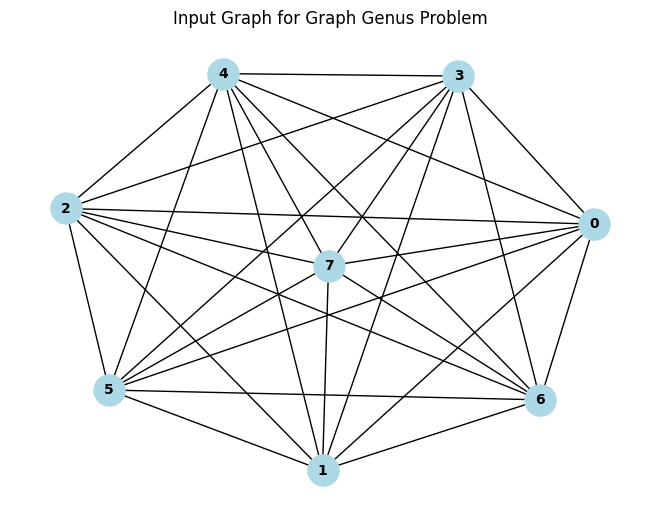

In [3]:
# Get the adjacency list (which is a graph object)
adj_list = problem.adj_list
graph = nx.Graph(adj_list)

def is_power_of_two(n):
    return (n != 0) and (n & (n - 1)) == 0

# Draw the generated graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Input Graph for Graph Genus Problem")
plt.show()

In [4]:
import pandas as pd

def get_best_result(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Sort the DataFrame by fitness and time
    df_sorted = df.sort_values(by=['Fitness', 'Time'])

    # Get the result with the lowest time while still having the lowest fitness
    best_result = df_sorted.iloc[0]

    return best_result

# Run the hill climb function and collect iteration data
# final_fitness, final_state, iteration_data = hill_climb(problem=problem, max_iter=max_iter, seed=seed, record_file="hill_climb_iterations.csv")
final_fitness, final_state, iteration_data = random_hill_climb(problem=problem, max_iters=max_iter, restarts=10, random_state=seed, record_file="random_hill_climb_iterations.csv")


# Convert the iteration data to a DataFrame
df_run_stats = pd.DataFrame(iteration_data)

# Filter the data to include only the iterations with iter = to a power of 2 and the last one
filtered_data = df_run_stats[df_run_stats['Iteration'].apply(is_power_of_two) | (df_run_stats['Iteration'] == df_run_stats['Iteration'].max())]

# Convert the filtered data DataFrame to an HTML table and display it
html_filtered_table = filtered_data.to_html(index=False)
display(HTML(html_filtered_table))


restarted
restarted
restarted
restarted
restarted
restarted
restarted
restarted
restarted
restarted
restarted


Iteration,Fitness,Time,State
1,8,0.009198,"{0: [2, 6, 3, 1, 5, 4, 7], 1: [7, 4, 5, 6, 0, 2, 3], 2: [5, 6, 4, 0, 3, 7, 1], 3: [2, 4, 1, 5, 7, 0, 6], 4: [1, 2, 3, 7, 5, 0, 6], 5: [3, 0, 2, 1, 4, 6, 7], 6: [0, 4, 7, 3, 1, 5, 2], 7: [4, 3, 5, 0, 1, 2, 6]}"
2,7,0.023806,"{0: [7, 4, 5, 1, 3, 6, 2], 1: [2, 7, 4, 5, 6, 0, 3], 2: [5, 6, 4, 0, 3, 7, 1], 3: [2, 4, 1, 5, 7, 0, 6], 4: [1, 2, 3, 7, 5, 0, 6], 5: [3, 0, 2, 1, 4, 6, 7], 6: [0, 4, 7, 3, 1, 5, 2], 7: [4, 3, 5, 0, 1, 2, 6]}"
4,7,0.059803,"{0: [7, 4, 5, 1, 3, 6, 2], 1: [2, 7, 4, 5, 6, 0, 3], 2: [5, 6, 4, 0, 3, 7, 1], 3: [2, 4, 1, 5, 7, 0, 6], 4: [1, 2, 3, 7, 5, 0, 6], 5: [3, 0, 2, 1, 4, 6, 7], 6: [0, 4, 7, 3, 1, 5, 2], 7: [4, 3, 5, 0, 1, 2, 6]}"
8,7,0.113820,"{0: [7, 4, 5, 1, 3, 6, 2], 1: [2, 7, 4, 5, 6, 0, 3], 2: [5, 6, 4, 0, 3, 7, 1], 3: [2, 4, 1, 5, 7, 0, 6], 4: [1, 2, 3, 7, 5, 0, 6], 5: [3, 0, 2, 1, 4, 6, 7], 6: [0, 4, 7, 3, 1, 5, 2], 7: [4, 3, 5, 0, 1, 2, 6]}"
16,7,0.181302,"{0: [7, 4, 5, 1, 3, 6, 2], 1: [2, 7, 4, 5, 6, 0, 3], 2: [5, 6, 4, 0, 3, 7, 1], 3: [2, 4, 1, 5, 7, 0, 6], 4: [1, 2, 3, 7, 5, 0, 6], 5: [3, 0, 2, 1, 4, 6, 7], 6: [0, 4, 7, 3, 1, 5, 2], 7: [4, 3, 5, 0, 1, 2, 6]}"
27,7,0.265047,"{0: [7, 4, 5, 1, 3, 6, 2], 1: [2, 7, 4, 5, 6, 0, 3], 2: [5, 6, 4, 0, 3, 7, 1], 3: [2, 4, 1, 5, 7, 0, 6], 4: [1, 2, 3, 7, 5, 0, 6], 5: [3, 0, 2, 1, 4, 6, 7], 6: [0, 4, 7, 3, 1, 5, 2], 7: [4, 3, 5, 0, 1, 2, 6]}"
1,8,0.007939,"{0: [4, 1, 7, 2, 5, 6, 3], 1: [5, 3, 7, 4, 0, 2, 6], 2: [7, 3, 6, 0, 4, 1, 5], 3: [1, 6, 4, 5, 0, 2, 7], 4: [1, 7, 5, 3, 2, 0, 6], 5: [7, 4, 3, 6, 1, 2, 0], 6: [7, 5, 4, 2, 3, 1, 0], 7: [2, 1, 3, 6, 0, 5, 4]}"
2,8,0.015699,"{0: [4, 1, 7, 2, 5, 6, 3], 1: [5, 3, 7, 4, 0, 2, 6], 2: [7, 3, 6, 0, 4, 1, 5], 3: [1, 6, 4, 5, 0, 2, 7], 4: [1, 7, 5, 3, 2, 0, 6], 5: [7, 4, 3, 6, 1, 2, 0], 6: [7, 5, 4, 2, 3, 1, 0], 7: [2, 1, 3, 6, 0, 5, 4]}"
4,8,0.031530,"{0: [4, 1, 7, 2, 5, 6, 3], 1: [5, 3, 7, 4, 0, 2, 6], 2: [7, 3, 6, 0, 4, 1, 5], 3: [1, 6, 4, 5, 0, 2, 7], 4: [1, 7, 5, 3, 2, 0, 6], 5: [7, 4, 3, 6, 1, 2, 0], 6: [7, 5, 4, 2, 3, 1, 0], 7: [2, 1, 3, 6, 0, 5, 4]}"
8,8,0.062262,"{0: [4, 1, 7, 2, 5, 6, 3], 1: [5, 3, 7, 4, 0, 2, 6], 2: [7, 3, 6, 0, 4, 1, 5], 3: [1, 6, 4, 5, 0, 2, 7], 4: [1, 7, 5, 3, 2, 0, 6], 5: [7, 4, 3, 6, 1, 2, 0], 6: [7, 5, 4, 2, 3, 1, 0], 7: [2, 1, 3, 6, 0, 5, 4]}"


In [8]:
def get_best_result(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Sort the DataFrame by fitness and time
    df_sorted = df.sort_values(by=['Fitness', 'Time'])

    # Get the result with the lowest time while still having the lowest fitness
    best_result = df_sorted.iloc[0]

    return best_result

# Example usage:
file_path = "hill_climb_iterations.csv"  # Change the file path accordingly
best_result = get_best_result(file_path)

# Convert the best result to a DataFrame
df_best_result = pd.DataFrame([best_result])

# Convert the DataFrame to an HTML table and display it
html_best_result_table = df_best_result.to_html(index=False)
display(HTML(html_best_result_table))

Iteration,Fitness,Time,State
9,6,0.138317,"{0: [1, 5, 7, 6, 4, 3, 2], 1: [4, 6, 7, 5, 3, 2, 0], 2: [7, 6, 5, 4, 0, 1, 3], 3: [4, 6, 5, 2, 1, 0, 7], 4: [0, 1, 2, 3, 5, 6, 7], 5: [0, 1, 2, 3, 4, 6, 7], 6: [5, 4, 3, 1, 0, 2, 7], 7: [0, 5, 4, 3, 1, 6, 2]}"


In [6]:
import os

def save_best_result(best_result, number_of_nodes, complete_graph, seed, file_path="best_results.csv"):
    data = {
        'Number of Nodes': [number_of_nodes],
        'Is Complete': [complete_graph],
        'Final Fitness': [best_result['Fitness']],
        'Time': [best_result['Time']],
        'Seed': [seed],
        'Final State': [best_result['State']]
    }
    df = pd.DataFrame(data)
    # Check if the file exists
    if os.path.exists(file_path):
        # If the file exists, append the new data
        df.to_csv(file_path, mode='a', header=False, index=False)
    else:
        # If the file doesn't exist, create a new one
        df.to_csv(file_path, index=False)

# Example usage:
file_path = "best_results.csv"  # Change the file path accordingly
save_best_result(best_result, number_of_nodes, complete_graph, seed, file_path)
